Imports

In [1]:
# OS and filesystem
from pathlib import Path

# Data
import pandas
from matplotlib import pyplot
import matplotx

# Console output
from colorama import Fore, Style

Constants

In [2]:
# Filesystem paths
PARENT_FOLDER = Path.cwd()
CONFIG_FOLDER = (PARENT_FOLDER / ".." / ".." / "config").resolve()
DATA_FOLDER = (PARENT_FOLDER / ".." / ".." / "data").resolve()
MODELS_FOLDER = (PARENT_FOLDER / ".." / ".." / "models").resolve()
TEMP_FOLDER = (PARENT_FOLDER / ".." / ".." / "temp").resolve()

Dataset

In [3]:
data = pandas.read_csv((DATA_FOLDER / "Android_Malware.csv"), index_col=0, delimiter=",", dtype={
    "Flow ID": str,
    "Source IP": str,
    "Source Port": int,
    "Destination IP": str,
    "Destination Port": int,
    "Protocol": float,
    "Timestamp": str,
    "Flow Duration": float,
    "Total Fwd Packets": float,
    "Total Backward Packets": float,
    "Total Length of Fwd Packets": float,
    "Total Length of Bwd Packets": float,
    "Fwd Packet Length Max": float,
    "Fwd Packet Length Min": float,
    "Fwd Packet Length Mean": float,
    "Fwd Packet Length Std": float,
    "Bwd Packet Length Max": float,
    "Bwd Packet Length Min": float,
    "Bwd Packet Length Mean": float,
    "Bwd Packet Length Std": float,
    "Flow Bytes/s": float,
    "Flow Packets/s": float,
    "Flow IAT Mean": float,
    "Flow IAT Std": float,
    "Flow IAT Max": float,
    "Flow IAT Min": float,
    "Fwd IAT Total": float,
    "Fwd IAT Mean": float,
    "Fwd IAT Std": float,
    "Fwd IAT Max": float,
    "Fwd IAT Min": float,
    "Bwd IAT Total": float,
    "Bwd IAT Mean": float,
    "Bwd IAT Std": float,
    "Bwd IAT Max": float,
    "Bwd IAT Min": float,
    "Fwd PSH Flags": float,
    "Bwd PSH Flags": float,
    "Fwd URG Flags": float,
    "Bwd URG Flags": float,
    "Fwd Header Length": float,
    "Bwd Header Length": float,
    "Fwd Packets/s": float,
    "Bwd Packets/s": float,
    "Min Packet Length": float,
    "Max Packet Length": float,
    "Packet Length Mean": float,
    "Packet Length Std": float,
    "Packet Length Variance": float,
    "FIN Flag Count": float,
    "SYN Flag Count": float,
    "RST Flag Count": float,
    "PSH Flag Count": float,
    "ACK Flag Count": float,
    "URG Flag Count": float,
    "CWE Flag Count": "object",  # Change later
    "ECE Flag Count": float,
    "Down/Up Ratio": "object",  # Change later
    "Average Packet Size": float,
    "Avg Fwd Segment Size": float,
    "Avg Bwd Segment Size": float,
    "Fwd Header Length.1": float,
    "Fwd Avg Bytes/Bulk": "object",  # Change later
    "Fwd Avg Packets/Bulk": float,
    "Fwd Avg Bulk Rate": float,
    "Bwd Avg Bytes/Bulk": float,
    "Bwd Avg Packets/Bulk": float,
    "Bwd Avg Bulk Rate": float,
    "Subflow Fwd Packets": float,
    "Subflow Fwd Bytes": float,
    "Subflow Bwd Packets": float,
    "Subflow Bwd Bytes": float,
    "Init_Win_bytes_forward": float,
    "Init_Win_bytes_backward": float,
    "act_data_pkt_fwd": float,
    "min_seg_size_forward": float,
    "Active Mean": float,
    "Active Std": float,
    "Active Max": float,
    "Active Min": float,
    "Idle Mean": float,
    "Idle Std": float,
    "Idle Max": float,
    "Idle Min": float,
    "Label": str
})
data.columns = data.columns.str.strip()
print(f"{data.shape[0]} rows, {data.shape[1]} columns")
data.head(n=5)

/tmp/ipykernel_3998/339254367.py:1: DtypeWarning: Columns (56,58) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pandas.read_csv((DATA_FOLDER / "Android_Malware.csv"), index_col=0, delimiter=",", dtype={


355630 rows, 85 columns


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.217.6.202-10.42.0.211-443-50004-6,10.42.0.211,50004,172.217.6.202,443.0,6.0,13/06/2017 11:52:39,37027,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
1,172.217.6.202-10.42.0.211-443-35455-6,10.42.0.211,35455,172.217.6.202,443.0,6.0,13/06/2017 11:52:39,36653,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
2,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,13/06/2017 11:52:42,534099,8,12,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
3,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,13/06/2017 11:52:43,9309,3,0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
4,131.253.61.68-10.42.0.211-443-51776-6,10.42.0.211,51776,131.253.61.68,443.0,6.0,13/06/2017 11:52:42,19890496,8,6,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware


Duplicated values

In [4]:
def duplicated_values(df, df_name: str = None) -> None:
    # Compute the dataset size, the count of duplicated value and the list of duplicated values
    data_count = df.shape[0] * df.shape[1]
    duplicated_count = df.duplicated().sum()
    duplicated = df[df.duplicated(keep=False)] if (duplicated_count > 0) else None

    # Show the result
    df_name = f" ({df_name})" if df_name is not None else ""
    print(f"{Style.BRIGHT}Duplicated values{df_name}:{Style.RESET_ALL} {duplicated_count} ({round((duplicated_count.sum() / data_count) * 100, 2)}%)")
    if duplicated is not None:
        print(duplicated)


duplicated_values(df=data)

Duplicated values: 2885 (0.01%)
                                    Flow ID       Source IP  Source Port  \
90    203.205.158.60-10.42.0.211-80-48574-6  203.205.158.60           80   
94    10.42.0.211-111.206.25.159-33521-80-6  111.206.25.159           80   
438   10.42.0.211-106.39.169.66-38659-443-6     10.42.0.211        38659   
475    10.42.0.211-119.146.74.34-36805-80-6   119.146.74.34           80   
476    10.42.0.211-119.146.74.48-33523-80-6   119.146.74.48           80   
..                                      ...             ...          ...   
406   10.42.0.211-118.178.143.65-50070-80-6     10.42.0.211        50070   
407    140.205.61.26-10.42.0.211-80-47648-6     10.42.0.211        47648   
408    140.205.61.26-10.42.0.211-80-47648-6     10.42.0.211        47648   
409   10.42.0.211-121.41.62.82-44183-1088-6     10.42.0.211        44183   
410  10.42.0.211-101.37.105.10-48779-6880-6     10.42.0.211        48779   

     Destination IP  Destination Port  Protocol        

In [5]:
data.drop_duplicates(keep="first", inplace=True)
duplicated_values(df=data)

Duplicated values: 0 (0.0%)


Null and empty values

In [6]:
def missing_values(df, df_name: str = None, keep_zeros=True) -> None:
    # Compute the dataset size and the count of missing value
    data_count = df.shape[0] * df.shape[1]
    missing = missing_df = df.isna().sum()

    # Filter out column with zero missing value
    if not keep_zeros:
        missing_df = missing_df[missing_df > 0]

    # Calculate the percent of missing values
    missing_df = missing_df.sort_values(ascending=False).apply(lambda m: f"{m} ({round((m * 100) / df.shape[0], 2)}%)")

    # Show the result
    df_name = f" ({df_name})" if df_name is not None else ""
    print((
        f"{Style.BRIGHT}Missing values{df_name}:{Style.RESET_ALL} {round((missing.sum() / data_count) * 100, 2)}%\n"
        f"{Style.DIM}{Fore.WHITE}{missing_df}{Style.RESET_ALL}"
    ))


missing_values(df=data, keep_zeros=False)

Missing values: 0.0%
Fwd Avg Packets/Bulk       4 (0.0%)
Fwd Avg Bulk Rate          4 (0.0%)
Bwd Avg Packets/Bulk       4 (0.0%)
Bwd Avg Bulk Rate          4 (0.0%)
Subflow Fwd Packets        4 (0.0%)
Subflow Fwd Bytes          4 (0.0%)
Subflow Bwd Packets        4 (0.0%)
Subflow Bwd Bytes          4 (0.0%)
Init_Win_bytes_forward     4 (0.0%)
Init_Win_bytes_backward    4 (0.0%)
act_data_pkt_fwd           4 (0.0%)
min_seg_size_forward       4 (0.0%)
Active Mean                4 (0.0%)
Active Std                 4 (0.0%)
Active Max                 4 (0.0%)
Active Min                 4 (0.0%)
Idle Mean                  4 (0.0%)
Idle Std                   4 (0.0%)
Idle Max                   4 (0.0%)
Bwd Avg Bytes/Bulk         4 (0.0%)
Idle Min                   4 (0.0%)
Fwd Header Length.1        3 (0.0%)
Avg Bwd Segment Size       3 (0.0%)
Avg Fwd Segment Size       3 (0.0%)
Average Packet Size        3 (0.0%)
Fwd Avg Bytes/Bulk         3 (0.0%)
Down/Up Ratio              2 (0.0%)
ECE Fla

In [7]:
data.dropna(inplace=True)
missing_values(df=data, keep_zeros=False)

Missing values: 0.0%
Series([], dtype: int64)


Clean columns with invalid type

In [8]:
data.drop(data.loc[data["CWE Flag Count"] == "SCAREWARE"].index, inplace=True)
data["CWE Flag Count"] = data["CWE Flag Count"].astype(int)
data["CWE Flag Count"].value_counts(normalize=True)

0    1.0
Name: CWE Flag Count, dtype: float64

In [9]:
data.drop(data.loc[data["Fwd Avg Bytes/Bulk"] == "BENIGN"].index, inplace=True)
data["Fwd Avg Bytes/Bulk"] = data["Fwd Avg Bytes/Bulk"].astype(float)
data["Fwd Avg Bytes/Bulk"].value_counts(normalize=True)

0.0    1.0
Name: Fwd Avg Bytes/Bulk, dtype: float64

In [10]:
data.drop(data.loc[data["Down/Up Ratio"] == "BENIGN"].index, inplace=True)
data["Down/Up Ratio"] = data["Down/Up Ratio"].astype(float)
data["Down/Up Ratio"].value_counts(normalize=True)

0.0     0.491565
1.0     0.474189
2.0     0.025262
3.0     0.006668
4.0     0.001434
5.0     0.000405
6.0     0.000150
8.0     0.000125
7.0     0.000099
12.0    0.000037
9.0     0.000023
10.0    0.000020
11.0    0.000020
75.0    0.000003
Name: Down/Up Ratio, dtype: float64

Distribution of Y label

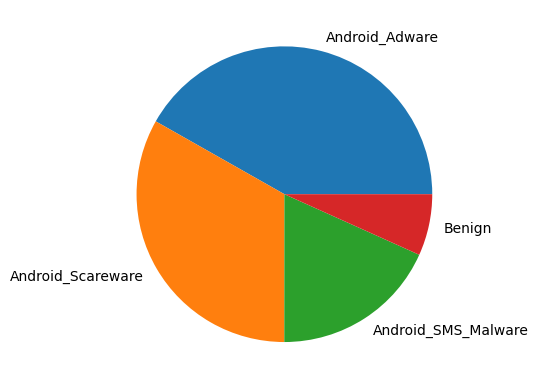

In [11]:
data["Label"].value_counts().plot(kind="pie")
pyplot.ylabel("")
pyplot.show()

Profiler

In [12]:
# results = ProfileReport(data_android.head(20000), title="Android Malware Pandas Profiling Report")
# results.to_file('report.html')

Save dataset

In [13]:
data.to_csv((DATA_FOLDER / "Android_Malware_cleaned.csv"), sep=",", index=False, mode="w")

In [26]:
payload = data.iloc[0].drop(["Flow ID", "Label"]).to_dict()
payload

{'Source IP': '10.42.0.211',
 'Source Port': 50004,
 'Destination IP': '172.217.6.202',
 'Destination Port': 443.0,
 'Protocol': 6.0,
 'Timestamp': '13/06/2017 11:52:39',
 'Flow Duration': 37027,
 'Total Fwd Packets': 1,
 'Total Backward Packets': 1,
 'Total Length of Fwd Packets': 0.0,
 'Total Length of Bwd Packets': 0.0,
 'Fwd Packet Length Max': 0.0,
 'Fwd Packet Length Min': 0.0,
 'Fwd Packet Length Mean': 0.0,
 'Fwd Packet Length Std': 0.0,
 'Bwd Packet Length Max': 0.0,
 'Bwd Packet Length Min': 0.0,
 'Bwd Packet Length Mean': 0.0,
 'Bwd Packet Length Std': 0.0,
 'Flow Bytes/s': 0.0,
 'Flow Packets/s': 54.01463796688903,
 'Flow IAT Mean': 37027.0,
 'Flow IAT Std': 0.0,
 'Flow IAT Max': 37027.0,
 'Flow IAT Min': 37027.0,
 'Fwd IAT Total': 0.0,
 'Fwd IAT Mean': 0.0,
 'Fwd IAT Std': 0.0,
 'Fwd IAT Max': 0.0,
 'Fwd IAT Min': 0.0,
 'Bwd IAT Total': 0.0,
 'Bwd IAT Mean': 0.0,
 'Bwd IAT Std': 0.0,
 'Bwd IAT Max': 0.0,
 'Bwd IAT Min': 0.0,
 'Fwd PSH Flags': 0.0,
 'Bwd PSH Flags': 0.0,
 '

In [61]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])


numeric_features = ["Source Port", "Destination Port", "Protocol", "Flow Duration", "Total Fwd Packets", "Total Backward Packets", "Total Length of Fwd Packets", "Total Length of Bwd Packets", "Fwd Packet Length Max", "Fwd Packet Length Min", "Fwd Packet Length Mean", "Fwd Packet Length Std", "Bwd Packet Length Max", "Bwd Packet Length Min", "Bwd Packet Length Mean", "Bwd Packet Length Std", "Flow Bytes/s", "Flow Packets/s", "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max", "Flow IAT Min", "Fwd IAT Total", "Fwd IAT Mean", "Fwd IAT Std", "Fwd IAT Max", "Fwd IAT Min", "Bwd IAT Total", "Bwd IAT Mean", "Bwd IAT Std", "Bwd IAT Max", "Bwd IAT Min", "Fwd PSH Flags", "Bwd PSH Flags", "Fwd URG Flags", "Bwd URG Flags", "Fwd Header Length", "Bwd Header Length", "Fwd Packets/s", "Bwd Packets/s", "Min Packet Length", "Max Packet Length", "Packet Length Mean", "Packet Length Std", "Packet Length Variance", "FIN Flag Count", "SYN Flag Count", "RST Flag Count", "PSH Flag Count", "ACK Flag Count", "URG Flag Count", "CWE Flag Count", "ECE Flag Count", "Down/Up Ratio", "Average Packet Size", "Avg Fwd Segment Size", "Avg Bwd Segment Size", "Fwd Header Length.1", "Fwd Avg Bytes/Bulk", "Fwd Avg Packets/Bulk", "Fwd Avg Bulk Rate", "Bwd Avg Bytes/Bulk", "Bwd Avg Packets/Bulk", "Bwd Avg Bulk Rate", "Subflow Fwd Packets", "Subflow Fwd Bytes", "Subflow Bwd Packets", "Subflow Bwd Bytes", "Init_Win_bytes_forward", "Init_Win_bytes_backward", "act_data_pkt_fwd", "min_seg_size_forward", "Active Mean", "Active Std", "Active Max", "Active Min", "Idle Mean", "Idle Std", "Idle Max", "Idle Min"]
categorical_features = ["Source IP", "Destination IP", "Timestamp"]

preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_transformer, numeric_features),
        ("categorical", categorical_transformer, categorical_features),
    ]
)
# preprocessor.fit_transform(data_x)

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,10.42.0.211,50004,172.217.6.202,443.0,6.0,13/06/2017 11:52:39,37027,1,1,0.0,...,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
payload_2 = preprocessor.fit_transform(pandas.DataFrame([payload]))
payload_2

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 1., 1.]])

In [59]:
from sklearn.model_selection import train_test_split

data2 = data.sample(n=5000)
data_x = data2.drop(["Label", "Flow ID"], axis=1)
data_y = data2["Label"]

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.20)

In [63]:
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("k_neighbors_classifier", KNeighborsClassifier())
])

pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Source Port',
                                                   'Destination Port',
                                                   'Protocol', 'Flow Duration',
                                                   'Total Fwd Packets',
                                                   'Total Backward Packets',
                                                   'Total Length of Fwd '
                                                   'Packets',
                                                   'Total Length of Bwd '
                                                   'Packets',
                                                   'Fwd Packet Length Max',
                                                   'Fwd Packet Length Min',
                                                   'Fwd...
                                                   'Flow IAT Max',
                                                   'Flow IAT Min',
                                                   'Fwd IAT Total',
                                                   'Fwd IAT Mean',
                                                   'Fwd IAT Std', 'Fwd IAT Max',
                                                   'Fwd IAT Min',
                                                   'Bwd IAT Total',
                                                   'Bwd IAT Mean',
                                                   'Bwd IAT Std', ...]),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Source IP',
                                                   'Destination IP',
                                                   'Timestamp'])])),
                ('k_neighbors_classifier', KNeighborsClassifier())])

In [64]:
x_test

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
2316,10.42.0.211,34894,137.175.31.97,80.0,6.0,15/06/2017 04:36:48,174618,3,4,657.0,...,1.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
409,10.42.0.211,44183,121.41.62.82,1088.0,6.0,30/06/2017 02:48:17,12192623,2,0,0.0,...,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2195,10.42.0.211,56114,10.42.0.1,53.0,17.0,30/06/2017 10:18:05,32183,1,1,30.0,...,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2719,10.42.0.1,48925,239.255.255.250,1900.0,17.0,13/06/2017 08:34:20,3003121,4,0,688.0,...,3.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3141,10.42.0.211,6854,10.42.0.1,53.0,17.0,13/06/2017 04:33:51,1090,1,1,36.0,...,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3694,10.42.0.211,54258,10.42.0.1,53.0,17.0,15/06/2017 01:56:45,30894,1,1,29.0,...,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538,10.42.0.211,55072,104.88.88.137,80.0,6.0,12/07/2017 01:36:27,23168,1,1,0.0,...,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3483,10.42.0.211,22947,10.42.0.1,53.0,17.0,14/06/2017 11:42:47,31866,1,1,33.0,...,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
283,10.42.0.211,52523,172.217.11.35,443.0,6.0,27/06/2017 06:04:32,2400385,104,145,2479.0,...,5.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
pandas.DataFrame([payload])

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,10.42.0.211,50004,172.217.6.202,443.0,6.0,13/06/2017 11:52:39,37027,1,1,0.0,...,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
pipeline.predict(pandas.DataFrame([payload]))[0]

'Android_Scareware'